### Scripts to construct a water balance from LIS ouptut, for GRACE comparison and forward modeling

In [1]:
# Import the necessary libraries
%matplotlib inline
import os
import sys

import xarray as xr

import pandas as pd

from dask.diagnostics import ProgressBar

import seaborn as sb

import matplotlib.pyplot as plt

import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

sys.path.append('../../scripts/')
from LIS import utils
from tools import animation_tools

In [ ]:
# These scripts were used to extract monthly averages of individual variables from the full netcdf output and serialize 
# them on to the /nobackup space on ADAPT

#with ProgressBar():
#    Snow_monthly = ds['Snowf_tavg'].resample('MS', 'time', how = 'sum')
#    Snow_monthly.to_netcdf('/att/nobackup/aarendt/snowMonthly.nc')

#### Read the data from the temporary nobackup space on ADAPT

In [2]:
data = xr.open_dataset('/att/nobackup/aarendt/snowmeltMonthly.nc')
snowmelt = data['Qsm_tavg'].groupby('time').sum().to_series()
data = xr.open_dataset('/att/nobackup/aarendt/rainMonthly.nc')
rain = data['Rainf_tavg'].groupby('time').sum().to_series()
data = xr.open_dataset('/att/nobackup/aarendt/sfcrunoffMonthly.nc')
sfc_roff = data['Qs_tavg'].groupby('time').sum().to_series()
data = xr.open_dataset('/att/nobackup/aarendt/snowMonthly.nc')
snow = data['Snowf_tavg'].groupby('time').sum().to_series()
data = xr.open_dataset('/att/nobackup/aarendt/subsfcrunoffMonthly.nc')
subsfc_roff = data['Qsb_tavg'].groupby('time').sum().to_series()
data = xr.open_dataset('/att/nobackup/aarendt/evapMonthly.nc')
evap = data['Evap_tavg'].groupby('time').sum().to_series()

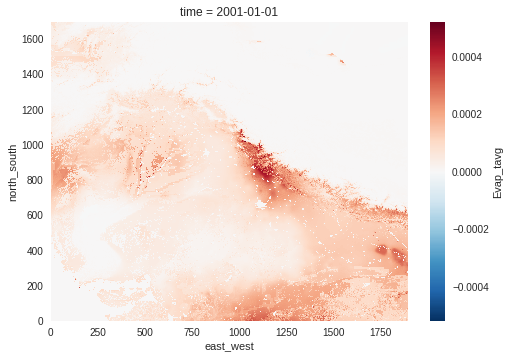

In [8]:
data['Evap_tavg'][0,:,:].plot()

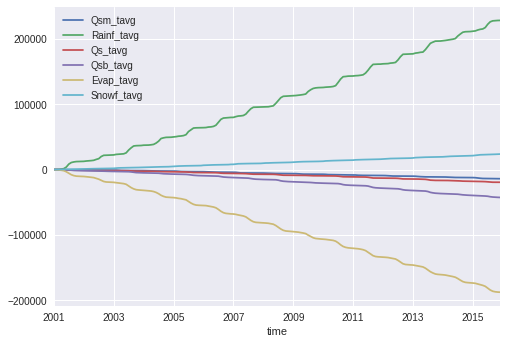

In [5]:
df = pd.concat([-snowmelt, rain, -sfc_roff, -subsfc_roff, -evap, snow], axis=1)
df.cumsum().plot()

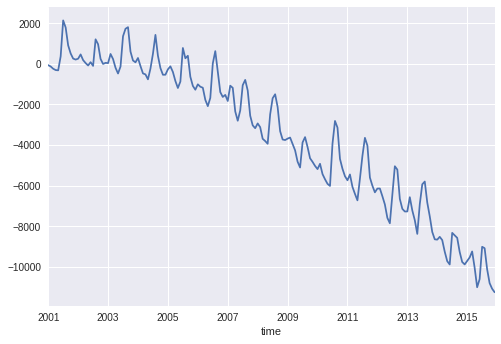

In [7]:
df = (rain + snow - sfc_roff - subsfc_roff - snowmelt - evap) 
df.cumsum().plot()

In [17]:
data = xr.open_dataset('/att/nobackup/aarendt/snowmeltMonthly.nc')
snowmelt = data['Qsm_tavg'].groupby('time.week').sum().to_series()
data = xr.open_dataset('/att/nobackup/aarendt/rainMonthly.nc')
rain = data['Rainf_tavg'].groupby('time.week').sum().to_series()
data = xr.open_dataset('/att/nobackup/aarendt/sfcrunoffMonthly.nc')
sfc_roff = data['Qs_tavg'].groupby('time.week').sum().to_series()
data = xr.open_dataset('/att/nobackup/aarendt/snowMonthly.nc')
snow = data['Snowf_tavg'].groupby('time.week').sum().to_series()
data = xr.open_dataset('/att/nobackup/aarendt/subsfcrunoffMonthly.nc')
subsfc_roff = data['Qsb_tavg'].groupby('time.week').sum().to_series()
data = xr.open_dataset('/att/nobackup/aarendt/evapMonthly.nc')
evap = data['Evap_tavg'].groupby('time.week').sum().to_series()

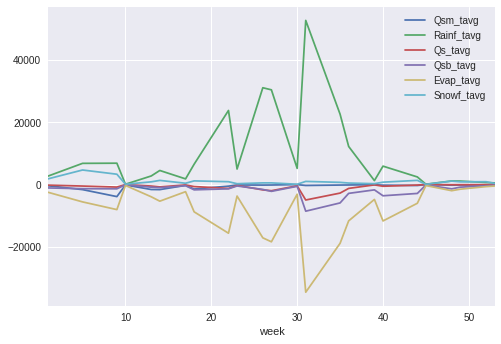

In [19]:
df = pd.concat([-snowmelt, rain, -sfc_roff, -subsfc_roff, -evap, snow], axis=1)
df.plot()

In [22]:
df.to_pickle('/att/nobackup/aarendt/annualHydrograph')